## Importing libraries

In [274]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import time
from time import mktime
from matplotlib import pyplot as plt
import seaborn as sns
import patsy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Importing my datasets

In [151]:
# NY_bikes = pd.read_csv("../../../Desktop/datasets/NYPD_Motor_Vehicle_Collisions.csv")
# NY_bike_count = pd.read_csv("../../../Desktop/datasets/NYC_bike_count.csv")
# NY_bike_new = pd.read_csv("../../../Downloads/NYPD_Motor_Vehicle_Collisions.csv")
NY_bike = NY_bike_new

# NY_weather_2012 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2012/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2012&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2013 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2013/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2013&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2014 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2014/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2014&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1')

# NY_weather_2015 = pd.read_csv(
# 'https://www.wunderground.com/history/airport/KNYC/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=&format=1')


In [154]:
NY_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959631 entries, 0 to 959630
Data columns (total 29 columns):
DATE                             959631 non-null object
TIME                             959631 non-null object
BOROUGH                          710155 non-null object
ZIP CODE                         710061 non-null float64
LATITUDE                         760788 non-null float64
LONGITUDE                        760788 non-null float64
LOCATION                         760788 non-null object
ON STREET NAME                   782274 non-null object
CROSS STREET NAME                757614 non-null object
OFF STREET NAME                  66852 non-null object
NUMBER OF PERSONS INJURED        959631 non-null int64
NUMBER OF PERSONS KILLED         959631 non-null int64
NUMBER OF PEDESTRIANS INJURED    959631 non-null int64
NUMBER OF PEDESTRIANS KILLED     959631 non-null int64
NUMBER OF CYCLIST INJURED        959631 non-null int64
NUMBER OF CYCLIST KILLED         959631 non-null int

## Munging data

In [163]:
# ## Replacing spaces(' ') in column header name with underscore('_')
# NY_bike.columns = NY_bike.columns.str.replace(' ', '_')

# # ## Filling all 'NaN' values with zeros
# NY_bike.fillna(0, inplace=True)

# # ## Converting the date/time columns to datetime
# NY_bike['DATE'] =pd.to_datetime(NY_bike['DATE'])
# NY_bike['TIME'] =pd.to_datetime(NY_bike['TIME'])

# # ## Sorting the dataframe by date
# NY_bike = NY_bike.sort_values(by='DATE')

NY = NY_bike

## Munging the weather data:

# NY_weather_2012.columns = NY_weather_2012.columns.str.replace(' ', '_')
# NY_weather_2013.columns = NY_weather_2013.columns.str.replace(' ', '_')
# NY_weather_2014.columns = NY_weather_2014.columns.str.replace(' ', '_')
# NY_weather_2015.columns = NY_weather_2015.columns.str.replace(' ', '_')

# NY_weather_2012.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2013.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2014.rename(columns={'EST': 'DATE'}, inplace=True)
# NY_weather_2015.rename(columns={'EST': 'DATE'}, inplace=True)

# NY_weather_2012.fillna(0, inplace=True)
# NY_weather_2013.fillna(0, inplace=True)
# NY_weather_2014.fillna(0, inplace=True)
# NY_weather_2015.fillna(0, inplace=True)

# NY_weather_2012['DATE'] = pd.to_datetime(NY_weather_2012['DATE'])
# NY_weather_2013['DATE'] = pd.to_datetime(NY_weather_2013['DATE'])
# NY_weather_2014['DATE'] = pd.to_datetime(NY_weather_2014['DATE'])
# NY_weather_2015['DATE'] = pd.to_datetime(NY_weather_2015['DATE'])

In [203]:
# _2012_mask = (NY_bike['DATE'] >= '07/01/2012') & (NY_bike['DATE'] <= '12/31/2012')
# _2012 = NY_bike[_2012_mask]
# _2012_mask2 = ((_2012['NUMBER_OF_CYCLIST_INJURED'] != 0) | (_2012['NUMBER_OF_CYCLIST_KILLED'] != 0))
# _2012 = _2012[_2012_mask2]
# _2012.index = _2012.DATE

In [204]:
# pv = pd.pivot_table(_2012, index=_2012.index.month, columns=_2012.NUMBER_OF_CYCLIST_INJURED,
#                     values='NUMBER_OF_CYCLIST_INJURED', aggfunc='sum')

# pv

In [224]:
# _2012_ = _2012.resample("M", how='sum')
_2012_['DATE'] = _2012_.index
_2012_

,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,UNIQUE_KEY,DATE
DATE,,,,,,,,,,,,,
2012-07-31,4509150.0,17019.048482,-30904.311358,467,3,5,0,450,3,12,0,68656421,2012-07-31
2012-08-31,4931034.0,18566.402693,-33715.570553,514,1,1,0,507,1,6,0,73782755,2012-08-31
2012-09-30,4274452.0,16042.987702,-29131.519185,441,1,0,0,433,1,8,0,65796421,2012-09-30
2012-10-31,3232313.0,12132.647221,-22034.408049,338,1,0,0,332,1,6,0,53825737,2012-10-31
2012-11-30,2743410.0,10301.197699,-18706.562393,277,0,0,0,276,0,1,0,44729326,2012-11-30
2012-12-31,2121735.0,7980.198866,-14493.183052,212,0,0,0,212,0,0,0,28411661,2012-12-31


In [257]:
_2012_.NUMBER_OF_CYCLIST_KILLED

DATE
2012-07-31    3
2012-08-31    1
2012-09-30    1
2012-10-31    1
2012-11-30    0
2012-12-31    0
Freq: M, Name: NUMBER_OF_CYCLIST_KILLED, dtype: int64

[<matplotlib.text.Text at 0x1d3571fd0>, <matplotlib.text.Text at 0x1d321aa90>]

[<matplotlib.text.Text at 0x1d3650f50>, <matplotlib.text.Text at 0x1d3646090>]

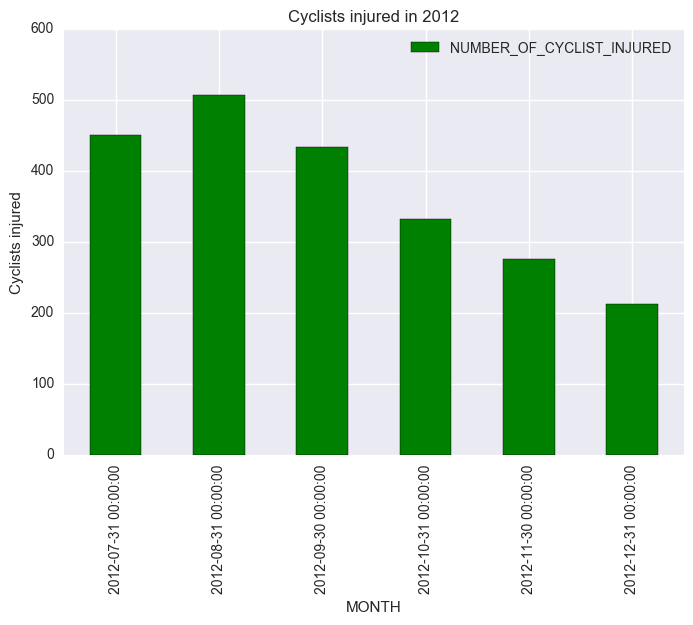

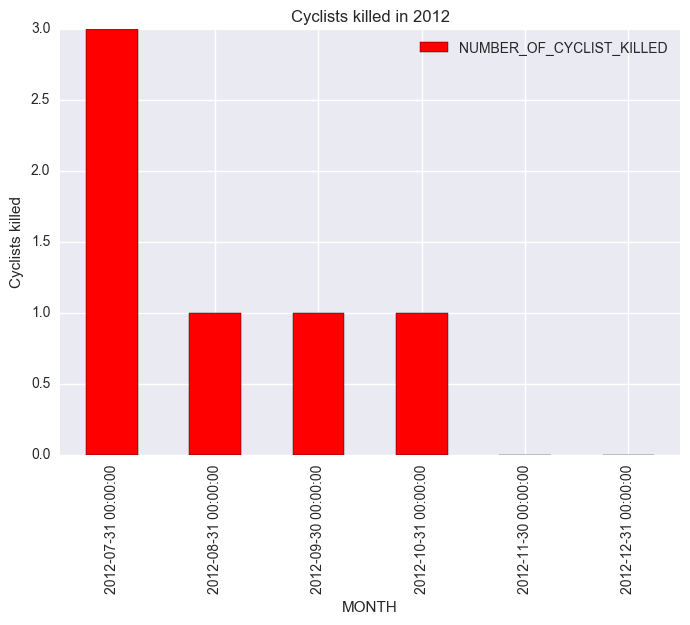

In [264]:
ax = _2012_.plot(x='DATE', y='NUMBER_OF_CYCLIST_INJURED', color='green', kind='bar', title='Cyclists injured in 2012')
ax.set(xlabel="MONTH", ylabel="Cyclists injured")
ax = _2012_.plot(x='DATE', y='NUMBER_OF_CYCLIST_KILLED', color='red', kind='bar', title='Cyclists killed in 2012')
ax.set(xlabel="MONTH", ylabel="Cyclists killed")
plt.show()

In [159]:
## separating my dataframe into quarters for trend analysis (number of accidents over time) and masking those
## dataframes to only show those instances in which cyclists were injured or killed.

# ## q3 2012:
q3_12_mask = (NY_bike['DATE'] >= '07/01/2012') & (NY_bike['DATE'] <= '09/30/2012')
q3_12 = NY_bike[q3_12_mask]
q3_12_mask2 = ((q3_12['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q3_12['NUMBER_OF_CYCLIST_KILLED'] != 0))
q3_12 = q3_12[q3_12_mask2]

## q4 2012:
q4_12_mask = (NY_bike['DATE'] >= '10/01/2012') & (NY_bike['DATE'] <= '12/31/2012')
q4_12 = NY_bike[q4_12_mask]
q4_12_mask2 = ((q4_12['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q4_12['NUMBER_OF_CYCLIST_KILLED'] != 0))
q4_12 = q4_12[q4_12_mask2]

# ## q1 2013:
q1_13_mask = (NY_bike['DATE'] >= '01/01/2013') & (NY_bike['DATE'] <= '03/31/2013')
q1_13 = NY_bike[q1_13_mask]
q1_13_mask2 = ((q1_13['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q1_13['NUMBER_OF_CYCLIST_KILLED'] != 0))
q1_13 = q1_13[q1_13_mask2]

# ## q2 2013:
q2_13_mask = (NY_bike['DATE'] >= '04/01/2013') & (NY_bike['DATE'] <= '06/30/2013')
q2_13 = NY_bike[q2_13_mask]
q2_13_mask2 = ((q2_13['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q2_13['NUMBER_OF_CYCLIST_KILLED'] != 0))
q2_13 = q2_13[q2_13_mask2]

# ## q3 2013:
q3_13_mask = (NY_bike['DATE'] >= '07/01/2013') & (NY_bike['DATE'] <= '09/30/2013')
q3_13 = NY_bike[q3_13_mask]
q3_13_mask2 = ((q3_13['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q3_13['NUMBER_OF_CYCLIST_KILLED'] != 0))
q3_13 = q3_13[q3_13_mask2]

# ## q4 2013:
q4_13_mask = (NY_bike['DATE'] >= '10/01/2013') & (NY_bike['DATE'] <= '12/31/2013')
q4_13 = NY_bike[q4_13_mask]
q4_13_mask2 = ((q4_13['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q4_13['NUMBER_OF_CYCLIST_KILLED'] != 0))
q4_13 = q4_13[q4_13_mask2]

# ## q1 2014
q1_14_mask = (NY_bike['DATE'] >= '01/01/2014') & (NY_bike['DATE'] <= '03/31/2014')
q1_14 = NY_bike[q1_14_mask]
q1_14_mask2 = ((q1_14['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q1_14['NUMBER_OF_CYCLIST_KILLED'] != 0))
q1_14 = q1_14[q1_14_mask2]

# ## q2 2014:
q2_14_mask = (NY_bike['DATE'] >= '04/01/2014') & (NY_bike['DATE'] <= '06/30/2014')
q2_14 = NY_bike[q2_14_mask]
q2_14_mask2 = ((q2_14['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q2_14['NUMBER_OF_CYCLIST_KILLED'] != 0))
q2_14 = q2_14[q2_14_mask2]

# ## q3 2014:
q3_14_mask = (NY_bike['DATE'] >= '07/01/2014') & (NY_bike['DATE'] <= '09/30/2014')
q3_14 = NY_bike[q3_14_mask]
q3_14_mask2 = ((q3_14['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q3_14['NUMBER_OF_CYCLIST_KILLED'] != 0))
q3_14 = q3_14[q3_14_mask2]

# ## q4 2014:
q4_14_mask = (NY_bike['DATE'] >= '10/01/2014') & (NY_bike['DATE'] <= '12/31/2014')
q4_14 = NY_bike[q4_14_mask]
q4_14_mask2 = ((q4_14['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q4_14['NUMBER_OF_CYCLIST_KILLED'] != 0))
q4_14 = q4_14[q4_14_mask2]

# ## q1 2015:
q1_15_mask = (NY_bike['DATE'] >= '01/01/2015') & (NY_bike['DATE'] <= '03/31/2015')
q1_15 = NY_bike[q1_15_mask]
q1_15_mask2 = ((q1_15['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q1_15['NUMBER_OF_CYCLIST_KILLED'] != 0))
q1_15 = q1_15[q1_15_mask2]

# ## q2 2015:
q2_15_mask = (NY_bike['DATE'] >= '04/01/2015') & (NY_bike['DATE'] <= '06/30/2015')
q2_15 = NY_bike[q2_15_mask]
q2_15_mask2 = ((q2_15['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q2_15['NUMBER_OF_CYCLIST_KILLED'] != 0))
q2_15 = q2_15[q2_15_mask2]

# ## q3 2015
q3_15_mask = (NY_bike['DATE'] >= '07/01/2015') & (NY_bike['DATE'] <= '09/30/2015')
q3_15 = NY_bike[q3_15_mask]
q3_15_mask2 = ((q3_15['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q3_15['NUMBER_OF_CYCLIST_KILLED'] != 0))
q3_15 = q3_15[q3_15_mask2]

# ## q4 2015
q4_15_mask = (NY_bike['DATE'] >= '10/01/2015') & (NY_bike['DATE'] <= '12/31/2015')
q4_15 = NY_bike[q4_15_mask]
q4_15_mask2 = ((q4_15['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q4_15['NUMBER_OF_CYCLIST_KILLED'] != 0))
q4_15 = q4_15[q4_15_mask2]

# ##q1 2016
q1_16_mask = (NY_bike['DATE'] >= '01/01/2016') & (NY_bike['DATE'] <= '03/31/2016')
q1_16 = NY_bike[q1_16_mask]
q1_16_mask2 = ((q1_16['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q1_16['NUMBER_OF_CYCLIST_KILLED'] != 0))
q1_16 = q1_16[q1_16_mask2]

# ##q2 2016
q2_16_mask = (NY_bike['DATE'] >= '04/01/2016') & (NY_bike['DATE'] <= '06/30/2016')
q2_16 = NY_bike[q2_16_mask]
q2_16_mask2 = ((q2_16['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q2_16['NUMBER_OF_CYCLIST_KILLED'] != 0))
q2_16 = q2_16[q2_16_mask2]

# ##q3 2016
q3_16_mask = (NY_bike['DATE'] >= '07/01/2016') & (NY_bike['DATE'] <= '09/30/2016')
q3_16 = NY_bike[q3_16_mask]
q3_16_mask2 = ((q3_16['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q3_16['NUMBER_OF_CYCLIST_KILLED'] != 0))
q3_16 = q3_16[q3_16_mask2]

# ##q4 2016
q4_16_mask = (NY_bike['DATE'] >= '10/01/2016') & (NY_bike['DATE'] <= '12/31/2016')
q4_16 = NY_bike[q4_16_mask]
q4_16_mask2 = ((q4_16['NUMBER_OF_CYCLIST_INJURED'] != 0) | (q4_16['NUMBER_OF_CYCLIST_KILLED'] != 0))
q4_16 = q4_16[q4_16_mask2]


In [276]:
d = date.today()

In [277]:
d.month

1

In [287]:
## writing a function to extract the month from the datetime objects so that I can plot each month's aggregated totals
## for each month

def month_extract(col):
    MONTH = []
    for i in col:
        MONTH.append(i.month)
    return MONTH

In [299]:
## creating a new column('MONTH') in the quarterly dataframes using the function previously made

# q3_12['MONTH'] = month_extract(q3_12['DATE'])
# q4_12['MONTH'] = month_extract(q4_12['DATE'])
# q1_13['MONTH'] = month_extract(q1_13['DATE'])
# q2_13['MONTH'] = month_extract(q2_13['DATE'])
# q3_13['MONTH'] = month_extract(q3_13['DATE'])
# q4_13['MONTH'] = month_extract(q4_13['DATE'])
# q1_14['MONTH'] = month_extract(q1_14['DATE'])
# q2_14['MONTH'] = month_extract(q2_14['DATE'])
# q3_14['MONTH'] = month_extract(q3_14['DATE'])
# q4_14['MONTH'] = month_extract(q4_14['DATE'])
# q1_15['MONTH'] = month_extract(q1_15['DATE'])
# q2_15['MONTH'] = month_extract(q2_15['DATE'])
# q3_15['MONTH'] = month_extract(q3_15['DATE'])
# q4_15['MONTH'] = month_extract(q4_15['DATE'])
# q1_16['MONTH'] = month_extract(q1_16['DATE'])
# q2_16['MONTH'] = month_extract(q2_16['DATE'])
# q3_16['MONTH'] = month_extract(q3_16['DATE'])
# q4_16['MONTH'] = month_extract(q4_16['DATE'])

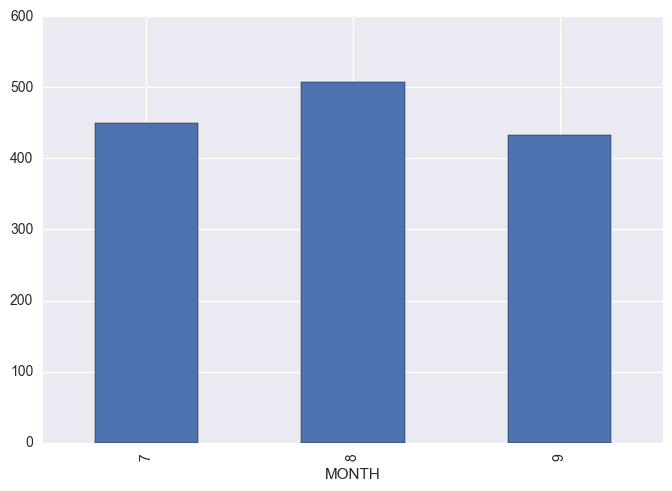

In [315]:
q3_12.groupby(['MONTH'])['NUMBER_OF_CYCLIST_INJURED'].sum().plot(kind='bar')
plt.show()

In [164]:
NY.groupby(['BOROUGH'])['NUMBER_OF_CYCLIST_INJURED'].sum()
NY.groupby(['BOROUGH'])['NUMBER_OF_CYCLIST_KILLED'].sum()

BOROUGH
0                2736
BRONX            1600
BROOKLYN         7034
MANHATTAN        5286
QUEENS           3455
STATEN ISLAND     179
Name: NUMBER_OF_CYCLIST_INJURED, dtype: int64

BOROUGH
0                15
BRONX             7
BROOKLYN         22
MANHATTAN        12
QUEENS           17
STATEN ISLAND     2
Name: NUMBER_OF_CYCLIST_KILLED, dtype: int64

In [166]:
## There were 2736 cyclists that were injured and 15 cyclists that were killed over the span between 2012 through 2015
## that occurred in the borough '0'. 

## I masked my dataset to show only those collisions in borough '0' so that I can investigate further.

NY_0 = NY[NY['BOROUGH'] == 0]
NY_0_mask = NY_0[(NY_0['NUMBER_OF_CYCLIST_INJURED'] != 0) | (NY_0['NUMBER_OF_CYCLIST_KILLED'] != 0)]
NY_0_mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445 entries, 823633 to 25126
Data columns (total 29 columns):
DATE                             2445 non-null datetime64[ns]
TIME                             2445 non-null datetime64[ns]
BOROUGH                          2445 non-null object
ZIP_CODE                         2445 non-null float64
LATITUDE                         2445 non-null float64
LONGITUDE                        2445 non-null float64
LOCATION                         2445 non-null object
ON_STREET_NAME                   2445 non-null object
CROSS_STREET_NAME                2445 non-null object
OFF_STREET_NAME                  2445 non-null object
NUMBER_OF_PERSONS_INJURED        2445 non-null int64
NUMBER_OF_PERSONS_KILLED         2445 non-null int64
NUMBER_OF_PEDESTRIANS_INJURED    2445 non-null int64
NUMBER_OF_PEDESTRIANS_KILLED     2445 non-null int64
NUMBER_OF_CYCLIST_INJURED        2445 non-null int64
NUMBER_OF_CYCLIST_KILLED         2445 non-null int64
NUMBER_OF_

In [107]:
NY_0_mask.NUMBER_OF_CYCLIST_KILLED.count()

1283

In [6]:
NY.BOROUGH.unique()

array(['STATEN ISLAND', 0, 'BROOKLYN', 'BRONX', 'QUEENS', 'MANHATTAN'], dtype=object)

In [120]:
##Passing a mask so that I can filter out those rows that contain a zero in either the Latitude or the Longitude columns
##so I can plot the points on the folium map.

NY_mask2 = (NY[NY['LATITUDE'] != 0])

In [142]:
NY_mask3 = NY_mask2.head()

In [143]:
NY_mask3

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,UNIQUE_KEY,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
937042,2012-07-01,2017-01-09 09:15:00,STATEN ISLAND,10310.0,40.634748,-74.112253,"(40.6347476, -74.1122528)",CASTLETON AVENUE,BEMENT AVENUE,0,...,Unspecified,0,0,0,284646,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0
801457,2012-07-01,2017-01-09 17:10:00,0,0.0,40.806346,-73.933172,"(40.8063462, -73.9331715)",0,0,0,...,Unspecified,Unspecified,Unspecified,0,2864058,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,0
801456,2012-07-01,2017-01-09 17:05:00,BROOKLYN,11225.0,40.657837,-73.950327,"(40.6578369, -73.9503273)",NOSTRAND AVENUE,HAWTHORNE STREET,0,...,Unspecified,0,0,0,152364,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0
801455,2012-07-01,2017-01-09 17:00:00,BROOKLYN,11231.0,40.673149,-74.012441,"(40.673149, -74.0124409)",DWIGHT STREET,BEARD STREET,0,...,Unspecified,0,0,0,170750,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0
801454,2012-07-01,2017-01-09 17:00:00,0,0.0,40.853709,-73.871857,"(40.8537088, -73.8718573)",0,0,0,...,Unspecified,0,0,0,2937606,PASSENGER VEHICLE,PICK-UP TRUCK,0,0,0


In [81]:
import folium

map_1 = folium.Map(location=[40.6347476, -74.1122528],
                   tiles = 'Stamen Terrain',
           zoom_start=10)

for i in range(len(q3_12)):
    folium.Marker((q3_12['LATITUDE'], q3_12['LONGITUDE']))

# folium.Marker((40.6347476, -74.1122528) ,icon=folium.Icon(icon='cloud')).add_to(map_1)
# folium.Marker((40.8063462, -73.9331715) ,icon=folium.Icon(icon='cloud')).add_to(map_1)

map_1

In [116]:
##Manual bike count DF
NY_bike_count['Year'] = pd.to_datetime(NY_bike_count['Year'])

In [25]:
NY_bike_count.groupby(['Year'])['CyclistVolume'].sum()

Year
2005     7160
2006     6968
2007     8608
2008     9482
2009     9972
2010    10607
2011     9973
2012    11199
2013    14983
2014    14599
2015    17502
Name: CyclistVolume, dtype: int64

In [43]:
NY.NUMBER_OF_CYCLIST_INJURED.sum()

14560

In [44]:
NY_injuries = NY.groupby(['DATE'])['NUMBER_OF_CYCLIST_INJURED'].sum().sort_values(ascending=False)
NY_injuries.count()

1279

In [51]:
##What time of day do the majority of bike accidents occur?

# NY_bikes.groupby(['TIME'])['NUMBER OF CYCLIST KILLED'].sum().sort_values(ascending=False)